In [1]:
import matplotlib.pyplot as plt
#%matplotlib inline
from matplotlib import collections as mc
import warnings
import numpy as np
import time
import os
from apgl.graph import VertexList
from scipy.io import mmread, mminfo
import networkx as nx 
warnings.filterwarnings('ignore')

In [2]:
def drawlinegraph(G, Xin, Xout, algo1="Algo1", algo2="Algo2"):
    gridsize = (1, 2)
    fig = plt.figure(figsize=(15, 6))
    axIN = plt.subplot2grid(gridsize, (0, 0))
    plt.axis('off')
    axIN.set_title(algo1)
    axOUT = plt.subplot2grid(gridsize, (0, 1))
    axOUT.set_title(algo2)
    
    axIN.set_xlim(min(Xin[:,0]), max(Xin[:,0]))
    axIN.set_ylim(min(Xin[:,1]), max(Xin[:,1]))
    axOUT.set_xlim(min(Xout[:,0]), max(Xout[:,0]))
    axOUT.set_ylim(min(Xout[:,1]), max(Xout[:,1]))
    linesIN = []
    linesOUT = []
    e = 0
    for i,j in zip(*graph.nonzero()):
        if i>j:
            linesIN.append([Xin[i], Xin[j]])
            linesOUT.append([Xout[i], Xout[j]])
            e += 1
    print ("Total edges = ", e, " Average Degree:", sum(d for n,d in G.degree()) / float(len(G)))
    lcIN = mc.LineCollection(linesIN, linewidths=.3, colors='#0000007f')
    lcOUT = mc.LineCollection(linesOUT, linewidths=.3, colors='#0000007f')
    axIN.add_collection(lcIN)
    axOUT.add_collection(lcOUT)
    plt.axis('off')

In [3]:
def drawnetworkxgraph(G, layout, ns, alp):
    plt.axis('off')
    nx.draw_networkx(G, layout, node_size=ns, with_labels=False, alpha=alp)
    

In [29]:
filename = "datasets/input/3elt_dual.mtx" 
#filename = "datasets/input/grid2_dual.mtx" 
#filename = "datasets/input/power.mtx" 
#filename = "datasets/input/sf_ba6000.mtx" 

graph = mmread(filename)
G = nx.Graph()
for i in range(mminfo(filename)[0]):
    G.add_node(i)
for i,j in zip(*graph.nonzero()):
    if i > j:
        G.add_edge(i, j)

In [5]:
nx.write_gml(G,"datasets/input/sf_ba6000.gml")

In [13]:
from collections import OrderedDict
def readCoordinatesFromGML(graph):
    gfile = open(graph, "r")
    ofile = open(graph+".txt", "w")
    coordinates = OrderedDict()
    for line in gfile.readlines():
        line = line.strip()
        if "id" in line:
            nid = line.split(" ")[1]
        elif "x" in line:
            x = line.split(" ")[1]
        elif "y" in line:
            y = line.split(" ")[1]
            coordinates[nid] = x + "\t" + y
            ofile.write(coordinates[nid]+"\n")
    gfile.close()
    ofile.close()

In [14]:
readCoordinatesFromGML("datasets/output/3elt_dual.forceatlas2_600.gml")
readCoordinatesFromGML("datasets/output/3elt_dual.forceatlas2_BH_600.gml")
readCoordinatesFromGML("datasets/output/3elt_dual.openord_600.gml")
readCoordinatesFromGML("datasets/output/grid2_dual.forceatlas2_600.gml")
readCoordinatesFromGML("datasets/output/grid2_dual.forceatlas2_BH_600.gml")
readCoordinatesFromGML("datasets/output/grid2_dual.openord_600.gml")
readCoordinatesFromGML("datasets/output/power.forceatlas2_600.gml")
readCoordinatesFromGML("datasets/output/power.forceatlas2_BH_600.gml")
readCoordinatesFromGML("datasets/output/power.openord_600.gml")
readCoordinatesFromGML("datasets/output/sf_ba6000.forceatlas2_600.gml")
readCoordinatesFromGML("datasets/output/sf_ba6000.forceatlas2_BH_600.gml")
readCoordinatesFromGML("datasets/output/sf_ba6000.openord_600.gml")

In [15]:
def readCoordinates(filename):
    corfile = open(filename)
    X = []
    for line in corfile.readlines():
        l = line.split("\t")
        X.append([float(l[0]), float(l[1])])
    X = np.array(X)
    corfile.close()
    return X

In [30]:
algo13elt_dual = readCoordinates("datasets/output/3elt_dual.mtxCACHEMINB128PARAOUTRAND600.txt")
algo23elt_dual = readCoordinates("datasets/output/3elt_dual.mtxCACHEMINB256PARAOUTRAND600.txt")
openord3elt_dual = readCoordinates("datasets/output/3elt_dual.openord_600.gml.txt")
forceatlas23elt_dual = readCoordinates("datasets/output/3elt_dual.forceatlas2_600.gml.txt")
forceatlas2bh3elt_dual = readCoordinates("datasets/output/3elt_dual.forceatlas2_BH_600.gml.txt")

In [26]:
algo1power = readCoordinates("datasets/output/power.mtxCACHEMINB128PARAOUTRAND600.txt")
algo2power = readCoordinates("datasets/output/power.mtxCACHEMINB256PARAOUTRAND600.txt")
openordpower = readCoordinates("datasets/output/power.openord_600.gml.txt")
forceatlas2power = readCoordinates("datasets/output/power.forceatlas2_600.gml.txt")
forceatlas2bhpower = readCoordinates("datasets/output/power.forceatlas2_BH_600.gml.txt")

In [22]:
algo1sf_ba6000 = readCoordinates("datasets/output/sf_ba6000.mtxCACHEMINB128PARAOUTRAND600.txt")
algo2sf_ba6000 = readCoordinates("datasets/output/sf_ba6000.mtxCACHEMINB256PARAOUTRAND600.txt")
openordsf_ba6000 = readCoordinates("datasets/output/sf_ba6000.openord_600.gml.txt")
forceatlas2sf_ba6000 = readCoordinates("datasets/output/sf_ba6000.forceatlas2_600.gml.txt")
forceatlas2bhsf_ba6000 = readCoordinates("datasets/output/sf_ba6000.forceatlas2_BH_600.gml.txt")

Total edges =  13278  Average Degree: 2.9506666666666668
Total edges =  13278  Average Degree: 2.9506666666666668


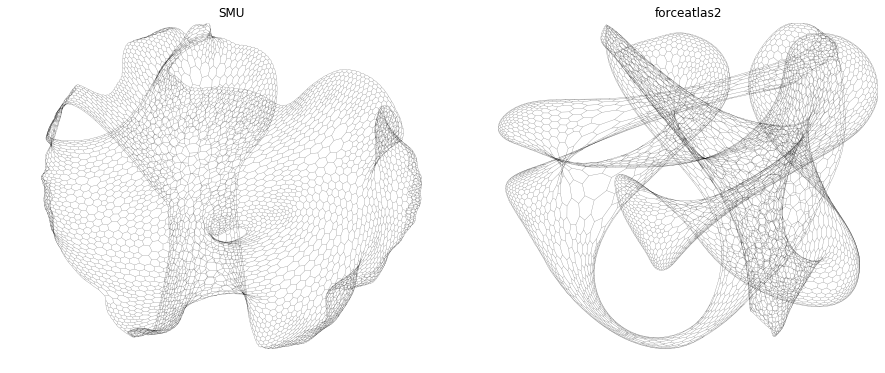

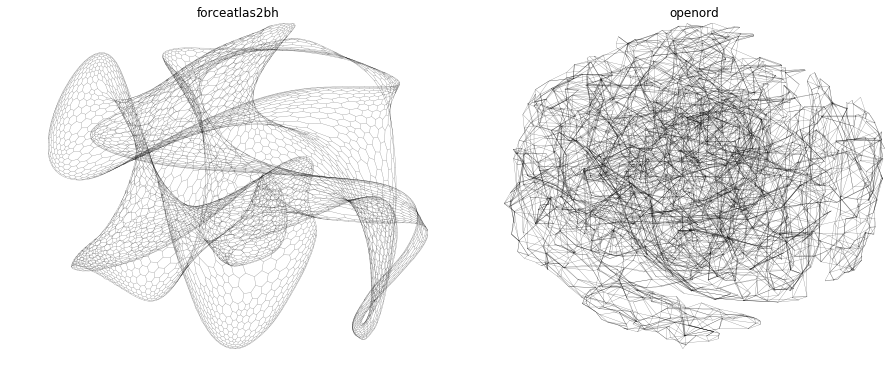

In [31]:
drawlinegraph(G, algo13elt_dual, forceatlas23elt_dual, "SMU", "forceatlas2")
drawlinegraph(G, forceatlas2bh3elt_dual, openord3elt_dual, "forceatlas2bh", "openord")

Total edges =  6594  Average Degree: 2.66909532483303
Total edges =  6594  Average Degree: 2.66909532483303


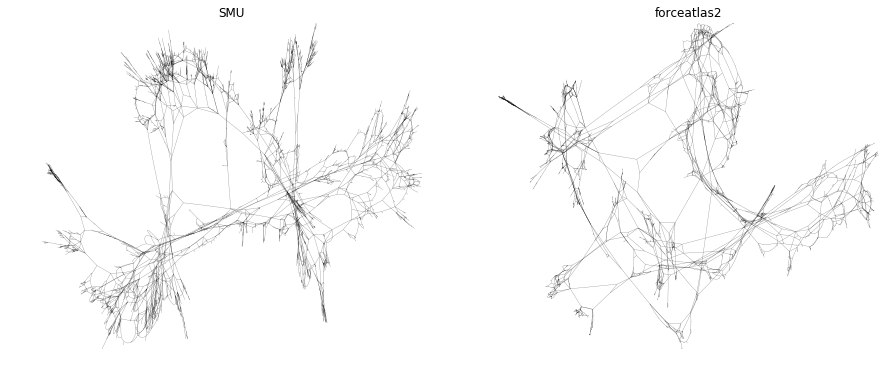

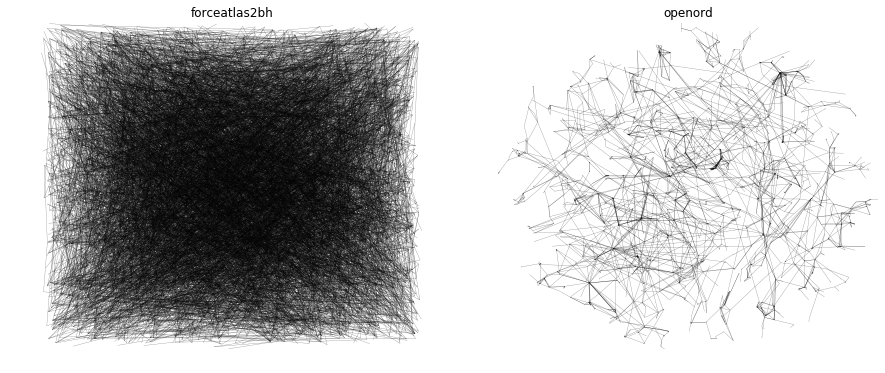

In [27]:
drawlinegraph(G, algo2power, forceatlas2power, "SMU", "forceatlas2")
drawlinegraph(G, forceatlas2bhpower, openordpower, "forceatlas2bh", "openord")

Total edges =  5999  Average Degree: 1.9996666666666667
Total edges =  5999  Average Degree: 1.9996666666666667


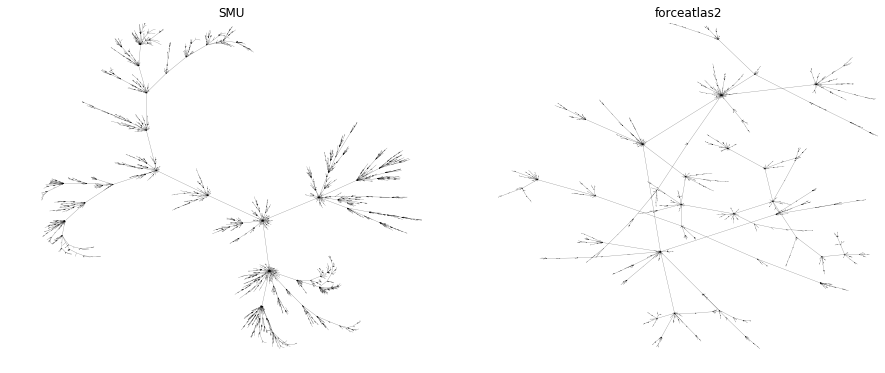

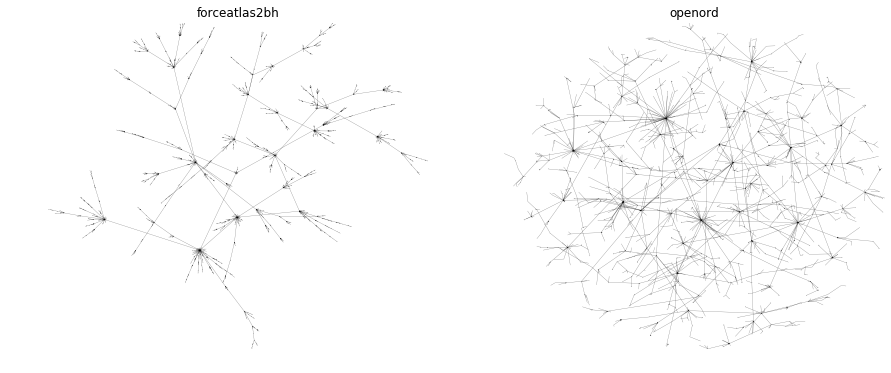

In [24]:
drawlinegraph(G, algo2sf_ba6000, forceatlas2sf_ba6000, "SMU", "forceatlas2")
drawlinegraph(G, forceatlas2bhsf_ba6000, openordsf_ba6000, "forceatlas2bh", "openord")

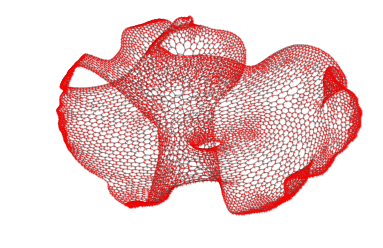

In [32]:
drawnetworkxgraph(G, algo13elt_dual, 1.2, 0.4)

In [33]:
def convertToGraphML(G, pos, filename):
    if len(G) > 0:
        pos = dict(enumerate(pos))
        for node, val in pos.items():
            x = val[0]
            y = val[1]
            G.node[node]['x'] = float(x)
            G.node[node]['y'] = float(y)
    nx.write_graphml(G, filename)

In [66]:
coordinates = readCoordinates("datasets/output/power.mtxCACHEMINB128PARAOUTRAND600.txt")

In [71]:
outputgmlfile = "datasets/output/power.mtxCACHEMINB128PARAOUTRAND600.txt.graphml"
convertToGraphML(G, coordinates, outputgmlfile)
#After this run following perl command
#perl -pe 's/d0/x/g;s/d1/y/g;' power.mtxCACHEMINB128PARAOUTRAND600.txt.graphml > power.mtxCACHEMINB128PARAOUTRAND600.txt.graphml.SMU.graphml
command = "perl -pe 's/d0/x/g;s/d1/y/g;' " + outputgmlfile +" > "+ outputgmlfile + ".SMU.graphml"
os.system(command)
os.system("rm " + outputgmlfile)

0